<a href="https://colab.research.google.com/github/BrothaaEww/MNIST/blob/main/MNIST_Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784', as_frame = False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
type(mnist)

sklearn.utils._bunch.Bunch

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
x,y = mnist.data, mnist.target

In [ ]:
print(x)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
x.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

In [ ]:
print(y)

['5' '0' '4' ... '4' '5' '6']


In [ ]:
x[0]

In [ ]:
y[0]

'5'

In [ ]:
some_digit = x[0]

In [ ]:
some_digit_img = some_digit.reshape(28,28)

In [ ]:
print(some_digit_img)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.  

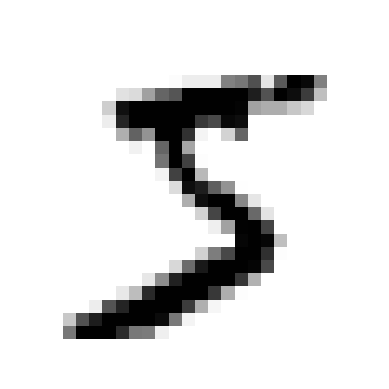

In [ ]:
plt.imshow(some_digit_img, cmap = plt.cm.binary, interpolation = 'nearest')
plt.axis('off')
plt.show()

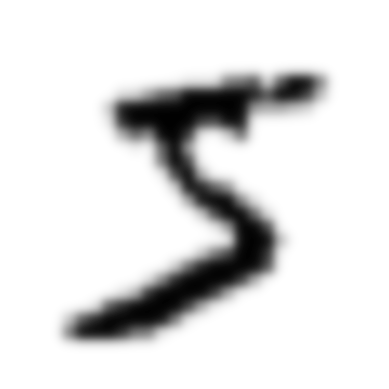

In [ ]:
plt.imshow(some_digit_img, cmap = plt.cm.binary, interpolation = 'gaussian')
plt.axis('off')
plt.show()

In [ ]:
y = y.astype(np.uint8)

In [ ]:
y[0]

5

In [ ]:
X_train, X_test, Y_train, Y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
Y_train.shape

(60000,)

In [ ]:
Y_test.shape

(10000,)

In [ ]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
Y_train_5 = Y_train == 5

In [ ]:
np.unique(Y_train_5)

array([False,  True])

**Strokastic Gradient Descend Classifier**

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd_cls = SGDClassifier(max_iter = 1000, random_state = 42)

In [ ]:
sgd_cls.fit(X_train,Y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_cls.predict([some_digit])

array([ True])

In [ ]:
sgd_cls.predict([X_test[0]])

array([False])

In [ ]:
Y_test[0]

7

**performance measures**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(sgd_cls, X_train, Y_train_5, cv = 3, scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.base import clone

In [ ]:
skfolds = StratifiedGroupKFold(n_splits = 3)

In [ ]:
for train_index, test_index in skfolds.split(X_train, Y_train_5):
  clone_cls = clone(sgd_cls)

  X_train_folds = X_train[train_index]
  Y_train_folds = Y_train_5[train_index]

  X_test_fold = X_train[test_index]
  Y_test_fold = Y_train_5[test_index]

  clone_cls.fit(X_train_folds,Y_train_folds)
  Y_predn = clone_cls.predict(X_test_fold)
  n_correct = sum(Y_predn == Y_test_fold)
  print(n_correct / len(Y_predn))

In [ ]:
X_test_fold.shape

(0, 784)

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
Y_train_5.shape

**CONFUSION MATRIX**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
y_preds = cross_val_predict(sgd_cls, X_train, Y_train_5, cv=3)

In [ ]:
confusion_matrix(Y_train_5,y_preds)

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
confusion_matrix(Y_train_5,Y_train_5)

**PRECEISION** = TP/(TP + FP)


**RECALL** = TP/(TP + FN)


In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision_score(Y_train_5, y_preds)

0.8370879772350012

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(Y_train_5, y_preds)

0.6511713705958311

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(Y_train_5, y_preds)

0.7325171197343846

In [ ]:
sgd_cls.decision_function([X_train[0]])

array([2164.22030239])

In [ ]:
sgd_cls.predict([X_train[0]])

array([ True])

In [ ]:
threshold = 3000

In [ ]:
sgd_cls.decision_function([X_train[0]]) > threshold

array([False])

In [ ]:
y_scores = cross_val_predict(sgd_cls, X_train, Y_train_5, cv = 3, method = 'decision_function')

In [ ]:
y_scores[:5]

array([  1200.93051237, -26883.79202424, -33072.03475406, -15919.5480689 ,
       -20003.53970191])

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(Y_train_5,y_scores)

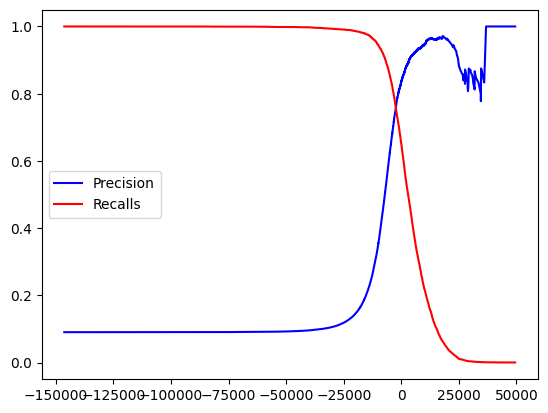

In [ ]:
plt.plot(thresholds, precisions[:-1], 'b', label = 'Precision')
plt.plot(thresholds, recalls[:-1], 'r', label = 'Recalls')
plt.legend(loc= 'center left')
plt.show()

In [ ]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.9)]

In [ ]:
print(threshold_90_precision)

3370.0194991439557


In [ ]:
y_preds_90 = y_scores >= threshold_90_precision

In [ ]:
precision_score(Y_train_5, y_preds_90)

0.9000345901072293

In [ ]:
recall_score(Y_train_5, y_preds_90)

0.4799852425751706

In [ ]:
recall_90_precision = thresholds[np.argmin(recalls>=0.91)]

In [ ]:
recall_90_precision

-7403.984368308757

In [ ]:
y_preds_90_recall = y_scores>=recall_90_precision
precision_score(Y_train_5, y_preds_90_recall)

0.4852926709296606

In [ ]:
recall_score(Y_train_5, y_preds_90_recall)

0.9099797085408596

**ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
fpr,tpr,thresholds = roc_curve(Y_train_5,y_scores)

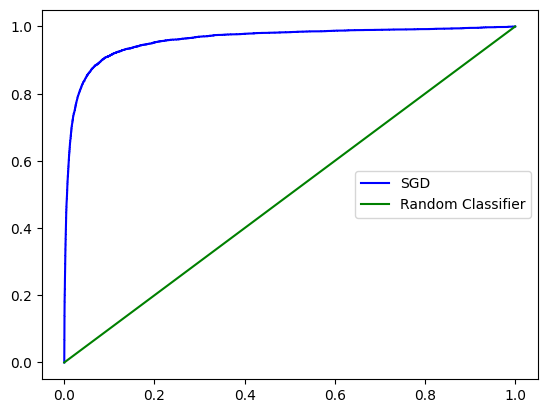

In [ ]:
plt.plot(fpr,tpr, 'b-', label = 'SGD')
plt.plot([0,1],[0,1],'g-',label='Random Classifier')
plt.legend(loc = 'center right')
plt.show()

In [ ]:
roc_auc_score(Y_train_5,y_scores)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rand_cls = RandomForestClassifier()

In [ ]:
y_probas = cross_val_predict(rand_cls, X_train, Y_train_5, cv=3, method = 'predict_proba')

In [ ]:
y_scores_rand = y_probas[:,1]

In [ ]:
fpr_rand, tpr_rand, thresholds_rand = roc_curve(Y_train_5,y_scores_rand)

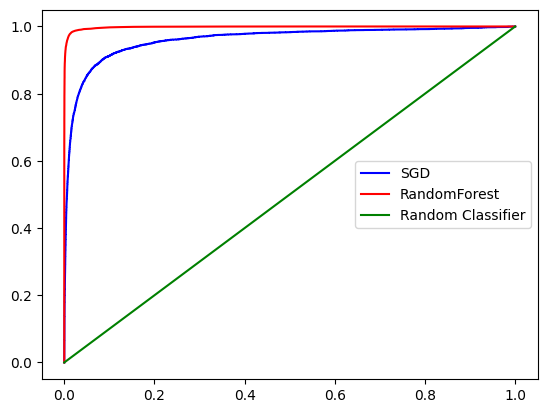

In [ ]:
plt.plot(fpr,tpr, 'b-', label = 'SGD')
plt.plot(fpr_rand,tpr_rand, 'r-', label = 'RandomForest')
plt.plot([0,1],[0,1],'g-',label='Random Classifier')
plt.legend(loc = 'center right')
plt.show()

In [ ]:
roc_auc_score(Y_train_5,y_scores_rand)

0.9983531687687409

**MULTICLASS CLASSIFICATION**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
log_reg.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
log_reg_1 = LogisticRegression(multi_class='ovr')

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

In [ ]:
ovr_cls= OneVsOneClassifier(LogisticRegression())

In [ ]:
ovr_cls.fit(X_train,Y_train)

In [ ]:
ovr_cls.predict([some_digit])

array([5], dtype=uint8)

**MULTIOUTPUT CLASSIFIER**

In [ ]:
y_train_odd = Y_train % 2 == 1
y_train_large = Y_train >= 7

In [ ]:
y_train_combined = np.c_[y_train_odd,y_train_large]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_cls = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
knn_cls.fit(X_train,y_train_combined)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_cls.predict([some_digit])

array([[ True, False]])

**real Multioutput Classification**

In [ ]:
noise1 = np.random.randint(0,100,X_train.shape)
noise2 = np.random.randint(0,100,X_test.shape)

In [ ]:
X_train_1 = X_train + noise1
X_test_1 = X_test + noise2

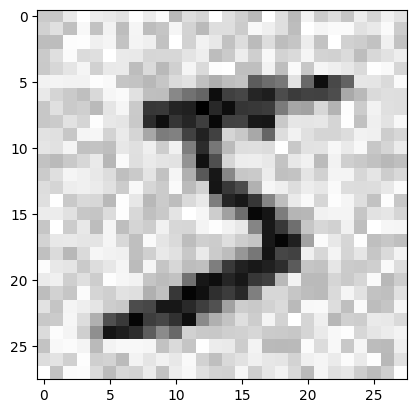

In [ ]:
plt.imshow(X_train_1[0].reshape(28,28), cmap = plt.cm.binary)

In [ ]:
y_train_1 = X_train
y_test_1 = X_test

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
knn_clf.fit(X_train_1,y_train_1)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
dirty_test_digit = X_test_1[0]

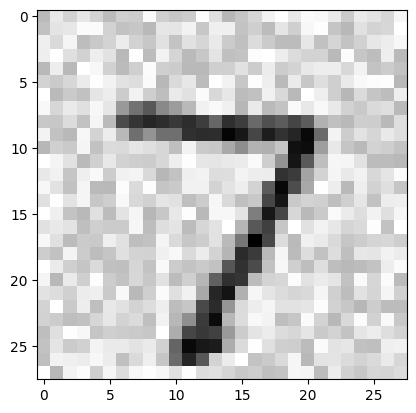

In [ ]:
plt.imshow(dirty_test_digit.reshape(28,28), cmap = plt.cm.binary)

In [ ]:
clean_digit = knn_clf.predict([dirty_test_digit])

(-0.5, 27.5, 27.5, -0.5)

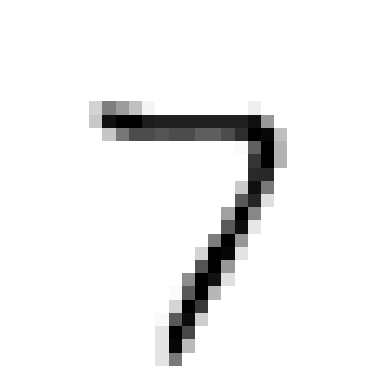

In [ ]:
plt.imshow(clean_digit.reshape(28,28), cmap = plt.cm.binary)
plt.axis('off')